# Pre-Midterm 2 Review (Part I)
## ECE204 Data Science & Engineering
### This notebook contains practice questions for Midterm 2. The following topics are covered:
- Loops and Flow Control
- Pivot Tables & Data Aggregation
- Data Cleaning
- Random Numbers

## I. Loops and Flow Control

> ### Question 1
> In this question, you have to find the count of **Fibonacci** numbers in a list. In a **Fibonacci Sequence**, each number in the sequence is the sum of the two numbers that precede it. So, the sequence goes like: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, and so on. Any number that belongs in this sequence is called a **Fibonacci number**.
>
> You have been given two lists (fib_list1 and fib_list2). **Find the count of all numbers in each list which are Fibonacci numbers (Use loops to solve this problem).** <br> Eg. in a list `[2, 9, 13, 55, 56, 22]`: 2, 13 and 55  are fibonacci numbers, hence the count is `3`.
>
> `Hint`: A number _'n'_ is a fibonacci number if one or both of the expressions $(5\cdot n^2 + 4)$ or $(5\cdot n^2 – 4)$ are perfect squares.


> Solve the problem in following steps:
>
> 1. Write a function `is_perfect_square(n)` that returns `True` if `n` is a perfect square and `False` otherwise. For example, `is_perfect_square(9)` returns `True`. (This function has already been given)
>
>2. Write a function `is_fibonacci(n)` that returns `True` if `n` is a Fibonacci number and `False` otherwise.
>
>3. Write a function `count_fibonacci(flist)` that loops through the elements of the list `flist` and returns the total number of Fibonacci numbers >contained in the list.
>
>4. If you can get this to work, try rewriting the `count_fibonacci(flist)` function so that it **uses a list comprehension rather than a loop.**
>
>5. **Bonus question:** can you solve the entire problem in one line of code?

In [1]:
import math

# Code to find if a number is a Perfect Square : Returns True if the input is a perfect square
def is_perfect_square(n):
    x = math.sqrt(n)
    return x == int(x) and n >= 0

# Two test cases
fib_list1 = [2, 9, 13, 55, 56, 22]
fib_list2 = [0, 1, 15, 377, 2, 3, 5, 12]

In [2]:
# Solution - loop
def is_fibonacci(n):
    return is_perfect_square(5*(n**2) + 4) or is_perfect_square(5*(n**2) - 4)
    
def count_fibonacci_loop(fib_list):
    count = 0
    for i in fib_list:
        if is_fibonacci(i):
            count += 1
    return count

print(count_fibonacci_loop(fib_list1))
print(count_fibonacci_loop(fib_list2))

3
6


In [3]:
# Solution - Using list-comprehension instead of loop
def count_fibonacci_lc(fib_list):
    return len([i for i in fib_list if is_fibonacci(i)])

print(count_fibonacci_lc(fib_list1))
print(count_fibonacci_lc(fib_list2))

3
6


In [4]:
# Solution -- In one line
fib_list2 = [0, 1, 15, 377, 2, 3, 5, 12]

sum([ 1 for n in fib_list2 if (math.sqrt(5*(n**2)+4) == int(math.sqrt(5*(n**2)+4))) or (math.sqrt(5*(n**2)-4) == int(math.sqrt(5*(n**2)-4))) ])

6

## II. Pivot Tables and Data Aggregation

> ## Question 2
> Import the video-game sales dataset `video-game-sales.csv`, which contains data about video games, their publishers,  Sales, Ratings etc. <br> **Using this data, your objective is write code to generate plots like the ones shown.**

> ### Question 2a
The plot shows **total** `Global_Sales` for each `Platform`.
![BP1](barplot1.png)

In [1]:
import pandas as pd

dfv = pd.read_csv("video-game-sales.csv")
dfv.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


Text(0, 0.5, 'Global Sales')

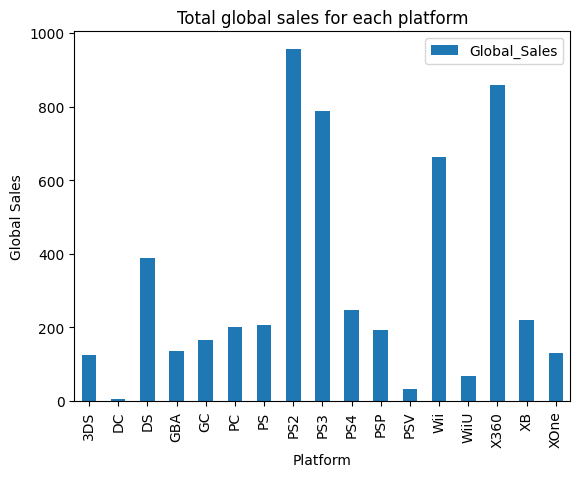

In [3]:
# Solution - a
dfv_pivot = dfv.pivot_table(index='Platform', values='Global_Sales', aggfunc='sum')
ax = dfv_pivot.plot.bar(title='Total global sales for each platform') 
ax.set_ylabel("Global Sales")

# or use group by:
# dfv.groupby(['Platform']).sum().reset_index().plot.bar(x='Platform', y='Global_Sales')

> ### Question 2b
> The plot shows **total** number of users (`User_Count`) for each `Genre`. <br><br>
![BP2](barplot2.png)<br>
> `Hint:` To produce a horizontal bar plot, use `.barh()` in place of `.bar()`.

In [4]:
dfv = pd.read_csv("video-game-sales.csv")

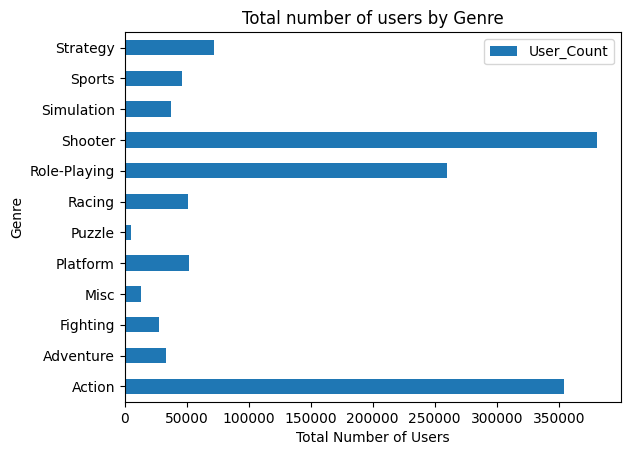

In [5]:
# Solution - b
dfv_pivot = dfv.pivot_table(index='Genre', values='User_Count', aggfunc='sum');
ax = dfv_pivot.plot.barh(title='Total number of users by Genre');
ax.set_xlabel("Total Number of Users");

> ### Question 2c
> The scatter plot shows the **median** `User_Score` vs **total** `User_Count` for each platform (where each point represents a single platform)

> ![SC1](scatter1.png)<br>

In [6]:
dfv = pd.read_csv("video-game-sales.csv")
dfv.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


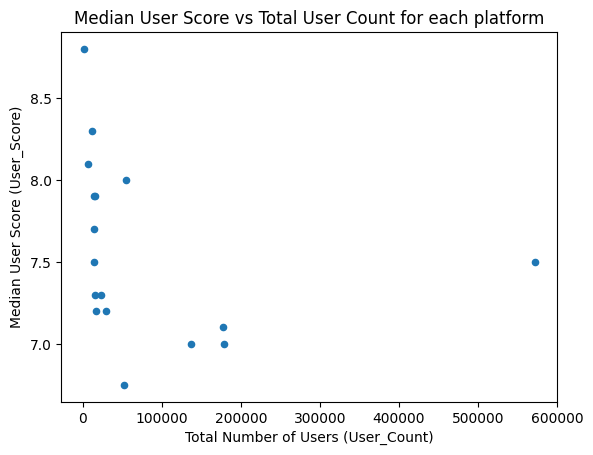

In [7]:
# Solution - c
dfv_pivot = dfv.pivot_table(index='Platform', values=['User_Score', 'User_Count'], aggfunc={'User_Score':'median', 'User_Count':'sum'})
ax = dfv_pivot.plot.scatter(x='User_Count', y='User_Score', title='Median User Score vs Total User Count for each platform')
ax.set_xlabel('Total Number of Users (User_Count)');
ax.set_ylabel('Median User Score (User_Score)');

> ## Question 3a
> Import the video-game sales dataset `video-game-sales.csv`, which contains data about video games, their publishers,  Sales, Ratings etc. <br>
> **Aggregate the data using `pivot_table` to get the `mean` Global_Sales and `mean` User_Count by Genre and Platform like the image below.**<br>
![Average](MPQ2_Img.png)
<br><br>
**`Note:` You may see NANs in the table after aggregation, what could be the reason behind them?**

In [8]:
import pandas as pd
dfv = pd.read_csv("video-game-sales.csv")

In [9]:
# Solution
dfv_pivot = dfv.pivot_table(index='Genre', columns=['Platform'], values=['Global_Sales', 'User_Count'], aggfunc='mean')
dfv_pivot.head()

Global_Sales                                                 \
Platform           3DS     DC        DS       GBA        GC        PC   
Genre                                                                   
Action        0.471194    NaN  0.463404  0.359403  0.355000  0.137039   
Adventure     0.177500  0.665  0.222326  0.426364  0.308000  0.046364   
Fighting      0.341250  0.280  0.211176  0.195000  0.591481  0.043333   
Misc          0.416364    NaN  1.645714  0.620714  0.650000  0.610000   
Platform      1.322857  0.120  1.417436  0.740364  0.469630  0.042632   

                                                   ... User_Count              \
Platform         PS       PS2       PS3       PS4  ...        PS2         PS3   
Genre                                              ...                          
Action     1.900000  0.872283  1.096250  0.730374  ...  75.344203  309.670833   
Adventure  0.220000  0.227959  0.715217  0.177895  ...  22.469388  423.869565   
Fighting   1.183125  0.796829  0.802167  0.474000  ...  37.426829   89.333333   
Misc       1.150000  0.623175  0.634286  0.343750  ...  16.412698   29.142857   
Platform   1.058333  0.654568  0.912609  0.455000  ...  41.271605  367.173913   

                                                                      \
Platform          PS4        PSP         PSV         Wii        WiiU   
Genre                                                                  
Action     457.420561  40.191011   81.466667   55.661765  167.955556   
Adventure  191.736842  19.761905   59.705882   16.392857    7.000000   
Fighting   237.866667  27.852941   60.900000   71.625000  105.250000   
Misc        63.125000  18.370370   84.666667   27.750000   94.928571   
Platform   305.928571  29.851852  150.285714  169.928571  354.157895   

                                              
Platform         X360         XB        XOne  
Genre                                         
Action     193.039683  19.376623  204.265625  
Adventure  166.812500  18.535714  247.500000  
Fighting    65.661765  15.216216  115.500000  
Misc        38.820896   7.478261   68.384615  
Platform    94.875000  14.781250  114.666667  

[5 rows x 34 columns]

> ## **Question 3b** 
> Now suppose not all platforms are important in your analysis. Aggregate the data to get mean `User_Count` by Genre and Platform, but only for selected Platforms:['PC', 'PS', 'PS2', 'PS3', 'PS4'] 

In [10]:
# Your code goes here

In [11]:
# Solution
dfv_pivot['User_Count'].loc[:, 'PC':'PS4']

Platform,PC,PS,PS2,PS3,PS4
Genre,,,,,
Action,520.830097,97.931034,75.344203,309.670833,457.420561
Adventure,210.795455,13.000000,22.469388,423.869565,191.736842
Fighting,346.666667,52.437500,37.426829,89.333333,237.866667
Misc,41.600000,38.800000,16.412698,29.142857,63.125000
Platform,411.421053,76.222222,41.271605,367.173913,305.928571
Puzzle,182.000000,5.500000,25.000000,50.000000,124.000000
Racing,192.974026,39.555556,27.926174,91.464789,209.428571
Role-Playing,1097.376000,156.500000,67.814286,289.113636,728.161290
Shooter,967.720812,19.764706,33.012987,309.622047,942.625000


## III. Random Numbers

> ## Question 4
> Generate 100,000 random points following a uniform distribution in the interval 20 to 60. Visualize the distribution using a histogram and confirm that it is indeed uniform.

In [12]:
# Code to import required libraries
import numpy as np
from numpy.random import rand

np.random.seed(1)   # set the random seed

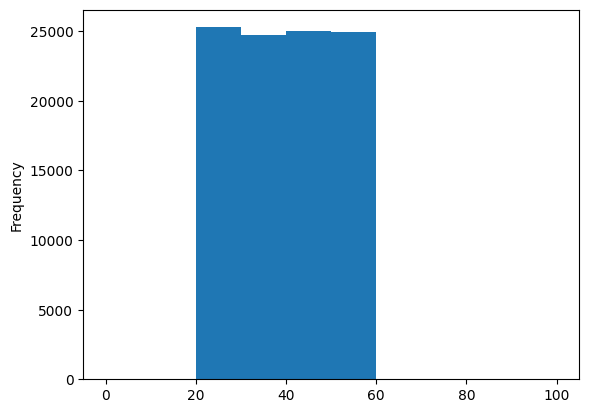

In [13]:
# Solution
a,b = 20,60
randnums_u = rand(100000)
s = pd.Series( (b-a)*randnums_u + a ) # rescale the random variable so it's in the interval [a,b]
s.plot.hist(bins = 10, range=(0,100) );

## IV. Data Cleaning
> ## **Question 5** 
> There was a survey that collected data (`person-type.csv`) whether the respondent was an "Early Bird" or a "Night Owl". People were expected to respond with either Yes / No to each type. It was allowed for a person to respond Yes or No to both too. However, the responses were not standarized, meaning people responded with various flavors of Yes and No. (like y, YES, n, N etc.). **Your objective is to standardize the data, and find out how many of people responded Yes to each type.**
>
> You can solve the problem in the following steps
> 1. use .unique() to find all possible responses.
> 2. use .replace() to fix the errors and produce a clean dataset.
> 3. Find out how many people responded Yes to "early bird" and "night owl".

In [ ]:
df = pd.read_csv('person-type.csv')
df.head()

In [ ]:
# Solution - Part 1
# use .unique() to find all possible responses.
print(df.Early_Bird.unique())
print(df.Night_Owl.unique())

In [ ]:
# Solution - Part 2
# use .replace() to fix the errors and produce a clean dataset.
df = df.replace(["y", "Y", "YES", "Ye"], "Yes")
df = df.replace(["N", "NO", "n"], "No")

# Check unique values after standardization
print(df.Early_Bird.unique())
print(df.Night_Owl.unique())

In [ ]:
# Solution - Part 3
# Find out how many people responded Yes to "early bird" and "night owl".
print(df.Early_Bird.value_counts())
print(df.Night_Owl.value_counts())

# 22 People responded No to each type, and 20 people responded Yes to each type

> ## **Question 6**
> This question deals with removal of outliers. There are 4 obvious outliers in the dataset `blobs.csv` (see scatter plot below). **Remove these obvious outliers, and plot the resulting dataset.**

<Axes: xlabel='foo', ylabel='bar'>

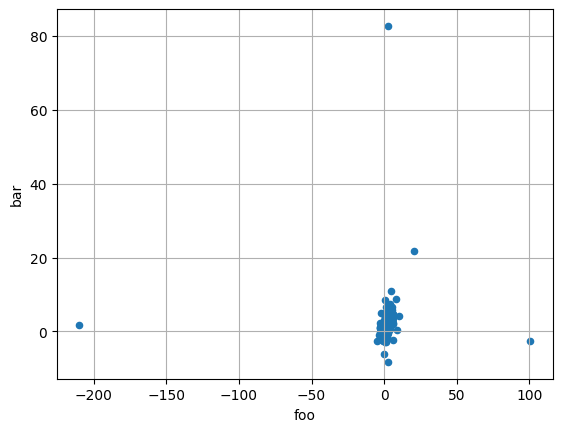

In [14]:
import pandas as pd
df = pd.read_csv("blobs.csv")
df.plot.scatter(x="foo", y="bar", grid=True)

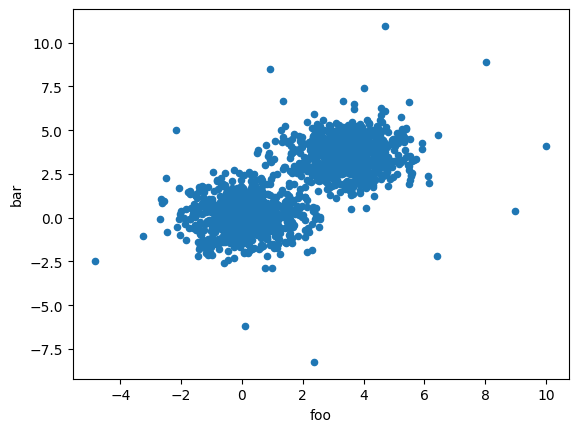

In [15]:
# Solution
i = (df.foo > -100) & (df.foo < 100) & (df.bar < 20)
df = df[i]
df.plot.scatter(x="foo", y="bar");